In [1]:
%pwd

'C:\\Users\\UOS\\PycharmProjects\\pythonProject\\JupyterNote\\DataAnaly\\NoteBooks'

In [2]:
cd ..

C:\Users\UOS\PycharmProjects\pythonProject\JupyterNote\DataAnaly


In [3]:
cd ..

C:\Users\UOS\PycharmProjects\pythonProject\JupyterNote


In [4]:
cd ..

C:\Users\UOS\PycharmProjects\pythonProject


In [5]:
cd MayFly_Finance\Project_vol1

C:\Users\UOS\PycharmProjects\pythonProject\MayFly_Finance\Project_vol1


step:  7
step_sub  4


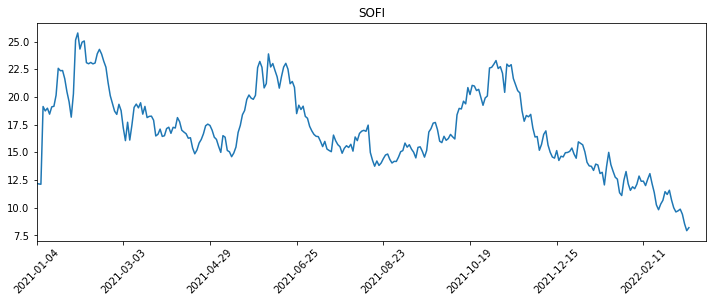

ValueError: x and y must have same first dimension, but have shapes (93,) and (0,)

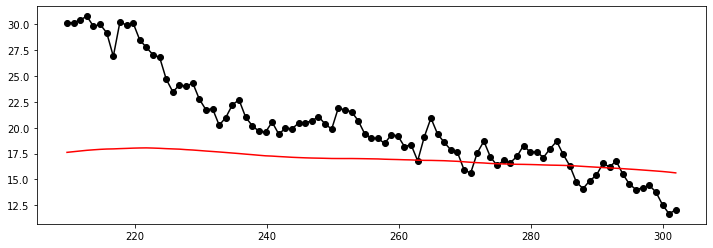

In [10]:
%run Trend_Dev.py

step:  7
step_sub  4


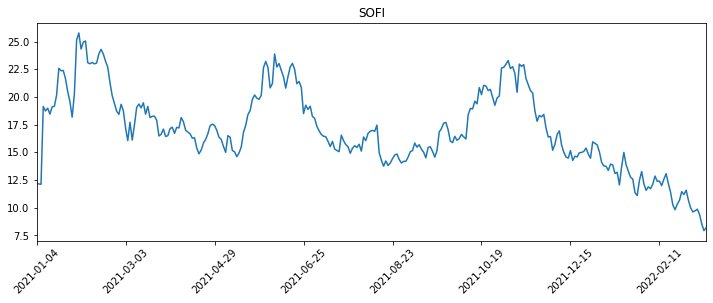

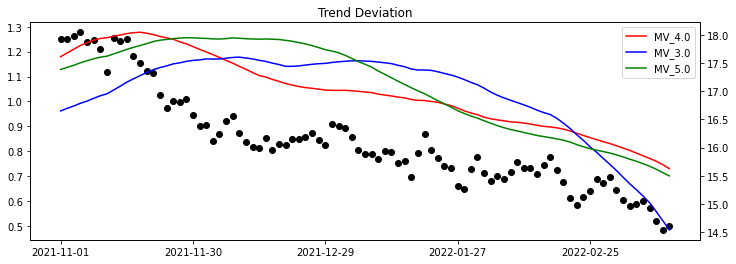

In [38]:
import numpy as np
import pandas as pd
import yfinance as yfin
import pandas_datareader as pdr
import matplotlib.pyplot as plt
stock = input("Enter the ACT symbol of the stock ")
step = int(input("Enter the months for trend Dev "))
step_sub = int(input("Enter the sub months for trend Dev "))
print('step: ', step)
print('step_sub ', step_sub)
def MV(stock, step):
    mv_step = step
    mv_stock = []
    n = len(stock)
    i = 0
    while i < n - mv_step + 1:
        window_stock = stock[i: i + mv_step]
        mv_stock.append(round(sum(window_stock) / mv_step, 5))
        i += 1
    return mv_stock

yfin.pdr_override()
df_SOFI = pdr.get_data_yahoo(stock)
df_SOFI = df_SOFI.reset_index()
h = len(df_SOFI)
Date = df_SOFI['Date'].dt.strftime('%Y-%m-%d')
Date = np.reshape(Date.to_numpy(),len(Date))
df_SP = pdr.get_data_yahoo('^IXIC')
df_SP = df_SP[-h:]
df_SP = df_SP.reset_index()
stock_close = df_SOFI['Close']
sp_close = df_SP['Close']
stock_close = np.reshape(stock_close.to_numpy(), len(stock_close))
sp_close = np.reshape(sp_close.to_numpy(), len(sp_close))
#This is what need
rs_close = stock_close/sp_close

#MV
step = step*30
step_sub_de = (step_sub - 1)*30
step_sub_in = (step_sub + 1)*30
step_sub = step_sub*30
MV_stock = MV(stock_close, step)
m = len(MV_stock)
trend_dev = stock_close[-m:]/MV_stock
MV_3 = MV(stock_close, step_sub_de)
MV_4 = MV(stock_close,step_sub)
MV_5 = MV(stock_close, step_sub_in)
MV_4 = MV_4[-m:]
MV_3 = MV_3[-m:]
MV_5 = MV_5[-m:]
#plot the result
Date_trend = Date[-m:]
x_close = np.linspace(0,len(stock_close),len(stock_close))
x_trend = x_close[-m:]
plt.figure(figsize = (12,4))
plt.plot(x_close, stock_close)
plt.xlim(210,len(x_close))
plt.xticks(x_close[::40], Date[::40], rotation = 45)
plt.title(stock)
plt.show()
#plot the result
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(x_trend, trend_dev, 'ko' ,label = 'Trend_Dev')
ax2 = ax.twinx()
ax2.plot(x_trend,MV_4, color = 'r', label = 'MV_' + str(step_sub/30))
ax2.plot(x_trend, MV_3, color = 'b', label = 'MV_'+ str((step_sub_de)/30))
ax2.plot(x_trend, MV_5, color = 'g', label = 'MV_'+ str((step_sub_in)/30))
plt.xticks(x_trend[::20], Date_trend[::20], rotation = 45)
plt.title('Trend Deviation')
plt.legend()
plt.show()

In [15]:
MV_3 = MV(stock_close, step_sub_de)
MV_4 = MV(stock_close,step_sub)
MV_5 = MV(stock_close, step_sub_in)

In [25]:
step_sub

120

step:  9
step_sub  4


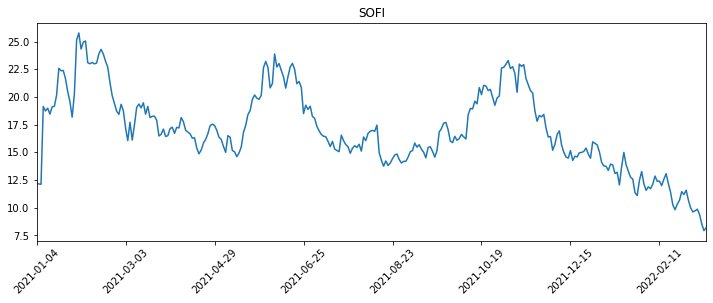

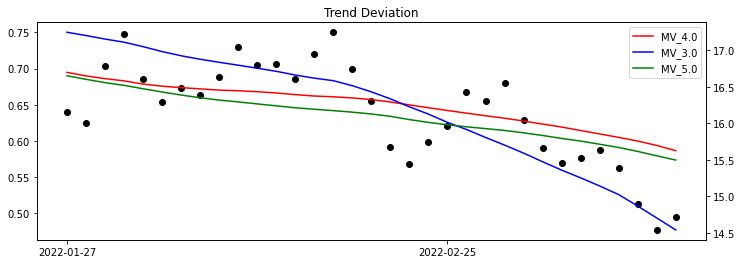

In [45]:
%run Trend_Dev.py